# Tract-Patch Search

In [1]:
from dask.distributed import Client
import lsdb
import skymap_convert
from lsdb_rubin import tract_patch_search

In [2]:
client = Client(n_workers=4, memory_limit="auto")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 20,Total memory: 31.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41833,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 31.00 GiB
Comm: tcp://127.0.0.1:38669,Total threads: 5
Dashboard: http://127.0.0.1:39467/status,Memory: 7.75 GiB
Nanny: tcp://127.0.0.1:40685,


## Load GAIA and the LSST skymap

In [3]:
# Load GAIA DR3 data.

gaia = lsdb.read_hats(
    "https://data.lsdb.io/hats/gaia_dr3/gaia",
    margin_cache="https://data.lsdb.io/hats/gaia_dr3/gaia_10arcs",
    columns=["ra", "dec", "source_id"],
)
gaia

,ra,dec,source_id
npartitions=2016,,,
"Order: 2, Pixel: 0",double[pyarrow],double[pyarrow],int64[pyarrow]
"Order: 2, Pixel: 1",...,...,...
...,...,...,...
"Order: 3, Pixel: 766",...,...,...
"Order: 3, Pixel: 767",...,...,...


In [4]:
# Load the LSST skymap.

import skymap_convert

lsst_skymap = skymap_convert.ConvertedSkymapReader(preset="lsst_skymap")

## Search by tract ID

In [5]:
tract_index = 10_000

In [6]:
# Only specify the tract (and not patch) to search by tract.

lsdb.catalog.Catalog.tract_patch_search = tract_patch_search

gaia_tract = gaia.tract_patch_search(skymap_reader=lsst_skymap, tract=tract_index)
gaia_tract

,ra,dec,source_id
npartitions=1,,,
"Order: 2, Pixel: 91",double[pyarrow],double[pyarrow],int64[pyarrow]


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Gaia DR3 Tract Search'}>)

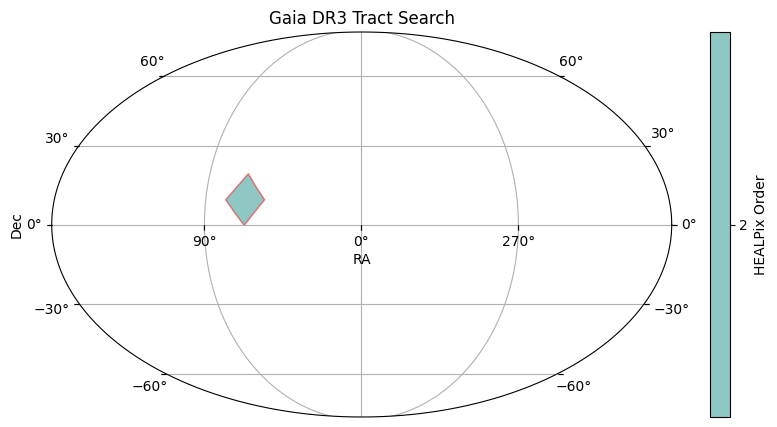

In [7]:
gaia_tract.plot_pixels(
    plot_title="Gaia DR3 Tract Search",
    fc="#00000000",
    ec="red",
    alpha=0.5,
)

### Plot the points within our tract search

In [8]:
df = gaia_tract.compute()
df

/home/delucchi/.virtualenvs/sep/lib/python3.12/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 116.78 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


,ra,dec,source_id
_healpix_29,,,
1639802835417463880,68.203995,2.975681,3279605661081091328
1639802841492181537,68.203247,2.977733,3279605656785438592
...,...,...,...
1641151407761376617,67.887616,4.452723,3282302793167185536
1641151432310627374,67.889151,4.456958,3282302866182610560


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Gaia DR3 Tract Search'}>)

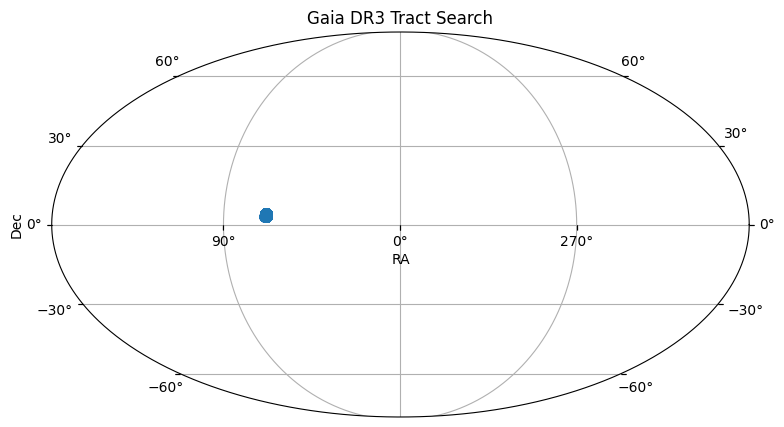

In [9]:
from lsdb.core.plotting import plot_points

plot_points.plot_points(
    df,
    ra_column="ra",
    dec_column="dec",
    title="Gaia DR3 Tract Search",
)

## Search by patch ID

In [10]:
tract_index = 12_345
patch_index = 67

In [11]:
# Specify both tract and patch to search by tract and patch.

gaia_tract_patch = gaia.tract_patch_search(
    skymap_reader=lsst_skymap,
    tract=tract_index,
    patch=patch_index,
)
gaia_tract_patch

,ra,dec,source_id
npartitions=1,,,
"Order: 2, Pixel: 77",double[pyarrow],double[pyarrow],int64[pyarrow]


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Gaia DR3 Tract and Patch Search'}>)

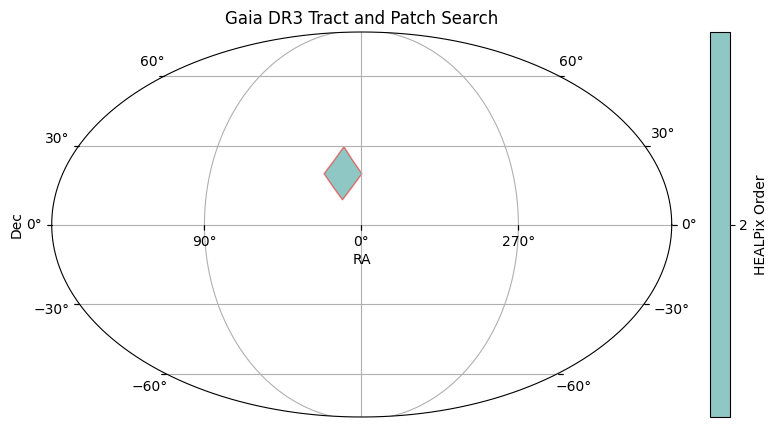

In [12]:
gaia_tract_patch.plot_pixels(
    plot_title="Gaia DR3 Tract and Patch Search",
    fc="#00000000",
    ec="red",
    alpha=0.5,
)

### Plot the points within our patch search

In [13]:
df = gaia_tract_patch.compute()
df

/home/delucchi/.virtualenvs/sep/lib/python3.12/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 116.78 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


,ra,dec,source_id
_healpix_29,,,
1391541465598669986,10.536577,18.763302,2783082908808855936
1391541497378182404,10.517209,18.768626,2783082977528999296
...,...,...,...
1397594393653904497,10.49788,18.927602,2795188768054498688
1397594464113664953,10.538114,18.92804,2795188905493452288


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Gaia DR3 Tract and Patch Search'}>)

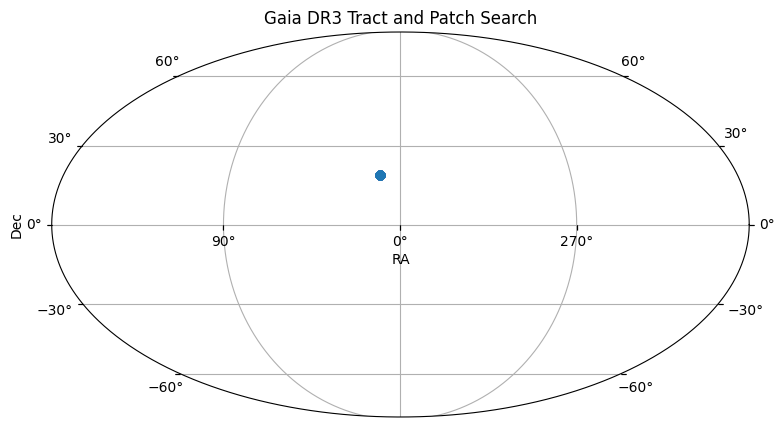

In [14]:
from lsdb.core.plotting import plot_points

plot_points.plot_points(
    df,
    ra_column="ra",
    dec_column="dec",
    title="Gaia DR3 Tract and Patch Search",
)

## About

**Authors**: Olivia Lynn

**Last updated on**: October 8, 2025

If you use ``lsdb`` for published research, please cite following [instructions](https://docs.lsdb.io/en/stable/citation.html).